Regression


Available columns: Index(['Month', 'Passengers'], dtype='object')


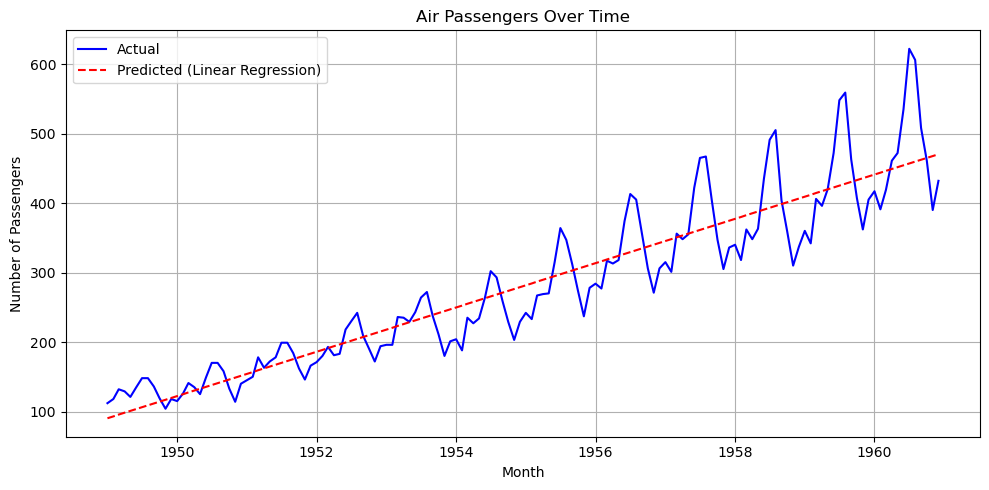

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('AirPassengers.csv')

# Check actual column names (optional for debugging)
print("Available columns:", data.columns)

# Rename if necessary
data.columns = ['Month', 'Passengers']

# Convert 'Month' column to datetime
data['Month'] = pd.to_datetime(data['Month'])

# Create numeric month index (0, 1, 2, ...)
data['Month_Num'] = np.arange(len(data))

# Prepare features and target
x = data[['Month_Num']]
y = data['Passengers']

# Train the model
model = LinearRegression()
model.fit(x, y)

# Predict values
y_pred = model.predict(x)

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(data['Month'], y, label='Actual', color='blue')
plt.plot(data['Month'], y_pred, label='Predicted (Linear Regression)', color='red', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.title('Air Passengers Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


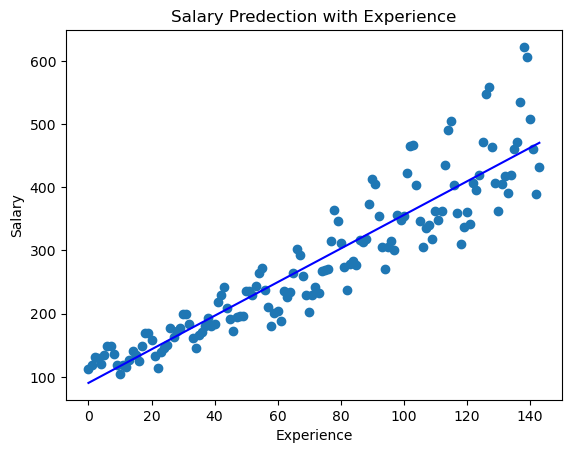

In [2]:
#plot
plt.scatter(x, y)
plt.plot(x, model.predict(x), color='blue')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Salary Predection with Experience')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
#load data
data1 = {'Rooms': [1,2,3,4,5], 'Area':[300, 700, 1100, 1300, 1500], 'price_in_million':[3,5,8,10,14]}
df= pd.DataFrame(data1)

In [5]:
x= df[['Rooms', 'Area']]
y= df['price_in_million']

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)
model= LinearRegression()

In [6]:
model.fit(x_train, y_train)
y_pred= model.predict(x_test)
print("MSE", mean_squared_error(y_test, y_pred))

MSE 2.2499999999999893


In [7]:
print("Price for n number of rooms and x sqft of areas", model.predict([[7, 2000]]))

Price for n number of rooms and x sqft of areas [20.3]


c:\Users\suvam\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


c:\Users\suvam\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


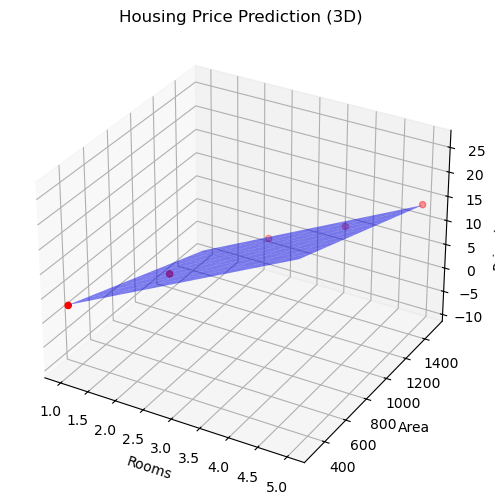

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
ax.scatter(df['Rooms'], df['Area'], df['price_in_million'], c='red', marker='o')

# Create a meshgrid for the regression plane
x_surf, y_surf = np.meshgrid(np.linspace(df['Rooms'].min(), df['Rooms'].max(), 10),
                             np.linspace(df['Area'].min(), df['Area'].max(), 10))

# Predict the prices for the meshgrid points
z_surf = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()])
z_surf = z_surf.reshape(x_surf.shape)

# Plot the regression plane
ax.plot_surface(x_surf, y_surf, z_surf, color='blue', alpha=0.5)

ax.set_xlabel('Rooms')
ax.set_ylabel('Area')
ax.set_zlabel('Price in Million')
ax.set_title('Housing Price Prediction (3D)')

plt.show()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [10]:
data={'Room': [1,2,3,4,5,6], 'Price':[10,20,35,40,47,58]}
df= pd.DataFrame(data)


In [11]:
x= df[['Room']]
y= df['Price']

In [12]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.33, random_state=0)

In [13]:
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred= model.predict(x_test)

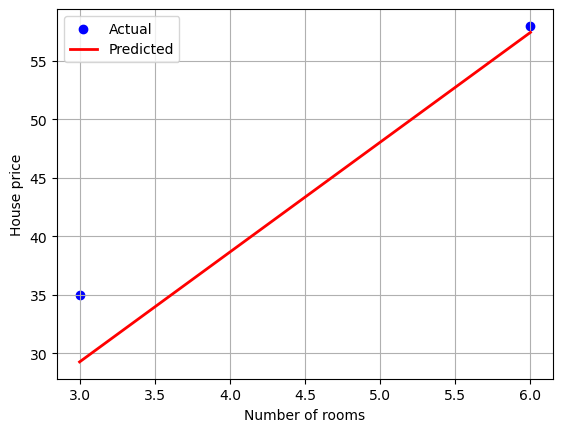

In [15]:
plt.scatter(x_test, y_test, color='blue',label="Actual")
plt.plot(x_test, y_pred, color="red", linewidth=2, label='Predicted')
plt.xlabel("Number of rooms")
plt.ylabel("House price")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
mae= mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
r2= r2_score(y_test, y_pred)
print("Evluation:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

Evluation:
MAE: 3.15
MSE: 16.68
RMSE: 4.08
R2: 0.87
